### Additional setup

In [1]:
# install additional packages
!pip install k3d > /dev/null
%matplotlib notebook

In [2]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as pypl
from pandas import read_csv
import json

## Configuration

In [3]:
class Config(object):
    def __init__(self, dataSourceUrl, quantitativeColumns, qualitativeColumns):
        self.dataSourceUrl = dataSourceUrl
        self.quantitativeColumns = quantitativeColumns
        self.qualitativeColumns = qualitativeColumns
def as_config(dct):
    return Config(
        dct['dataSourceUrl'],
        dct['quantitativeColumns'],
        dct['qualitativeColumns'],
        )

json_config ="""
{
    "dataSourceUrl": "/home/jovyan/host-note/fertility_Diagnosis.data",
    "quantitativeColumns": [
        "season",
        "childish_disease", 
        "accident_trauma", 
        "surgical_treatmnent",
        "fevers", 
        "alcohol_consumption", 
        "smoking_habit", 
        "output_diagnosis"
    ],
    "qualitativeColumns": [
        "age", 
        "hours_sitting"
    ]
}"""
config = json.loads(json_config, object_hook = as_config)

## Data description

In [4]:
for line in [line for line in Path('/home/jovyan/host-note/fertility_Diagnosis.names').read_text().splitlines() if line]:
    print(line)

Attribute Information:
Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)
Age at the time of analysis. 18-36 (0, 1)
Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)
Accident or serious trauma 1) yes, 2) no. (0, 1)
Surgical intervention 1) yes, 2) no. (0, 1)
High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)
Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)
Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)
Number of hours spent sitting per day ene-16 (0, 1)
Output: Diagnosis normal (N), altered (O) 


## Divide into qualitative and quantitative

In [5]:
dataset = read_csv(config.dataSourceUrl, header=0)
qualitativeDataset = dataset[config.qualitativeColumns]
quantitativeDataset = dataset[config.quantitativeColumns]
dataset.shape

(100, 10)

## Describe

In [6]:
qualitativeDataset.describe()

,age,hours_sitting
count,100.000000,100.000000
mean,0.669000,0.406800
std,0.121319,0.186395
min,0.500000,0.060000
25%,0.560000,0.250000
50%,0.670000,0.380000
75%,0.750000,0.500000
max,1.000000,1.000000


## Modes

In [7]:
qualitativeDataset.mode()

,age,hours_sitting
0,0.67,0.25


## Correlation matrix

In [8]:
qualitativeDataset.corr()

,age,hours_sitting
age,1.000000,-0.442452
hours_sitting,-0.442452,1.000000


## Histogram for attributes with highest correlation

<IPython.core.display.Javascript object>


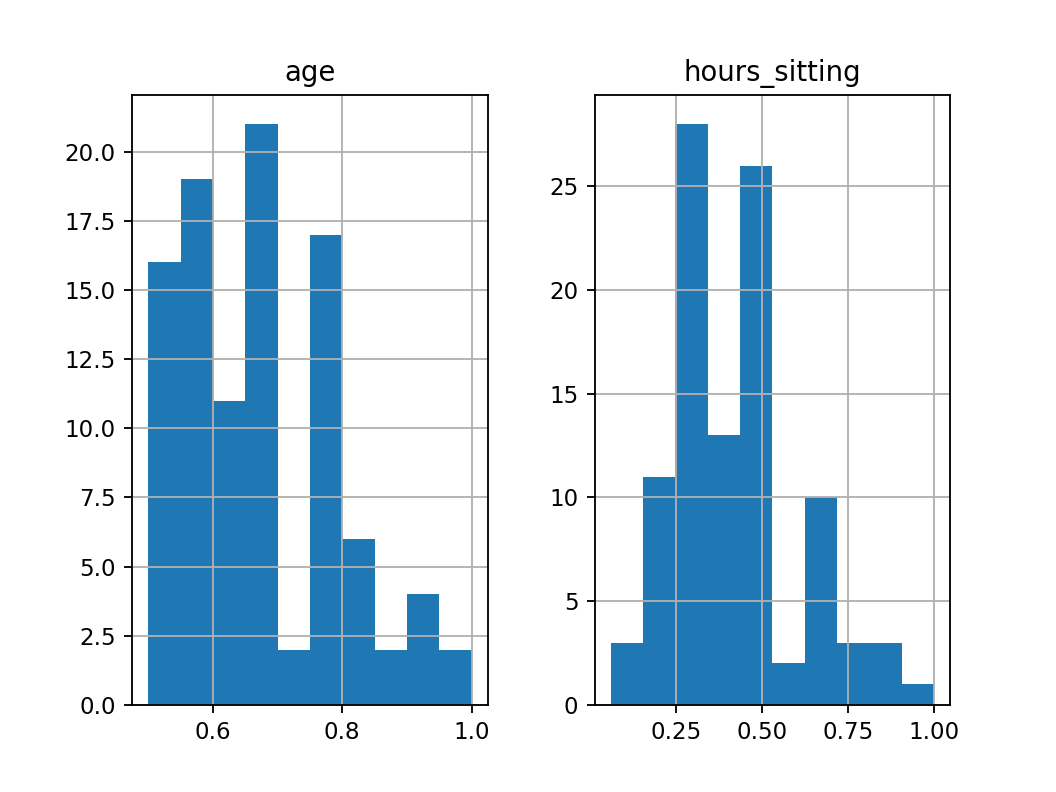

In [20]:
corr = qualitativeDataset.corr()
max = -2
c, r = "", ""
for column in corr:
    for row in corr:
        if row != column and np.absolute(corr[column][row]) > max:
            max = np.absolute(corr[column][row])
            c = column
            r = row
hist = qualitativeDataset.hist(column=[c, r])

# Births

Średnia ilość urodzeń w ciagu dnia to: 9648.940177960301


<IPython.core.display.Javascript object>


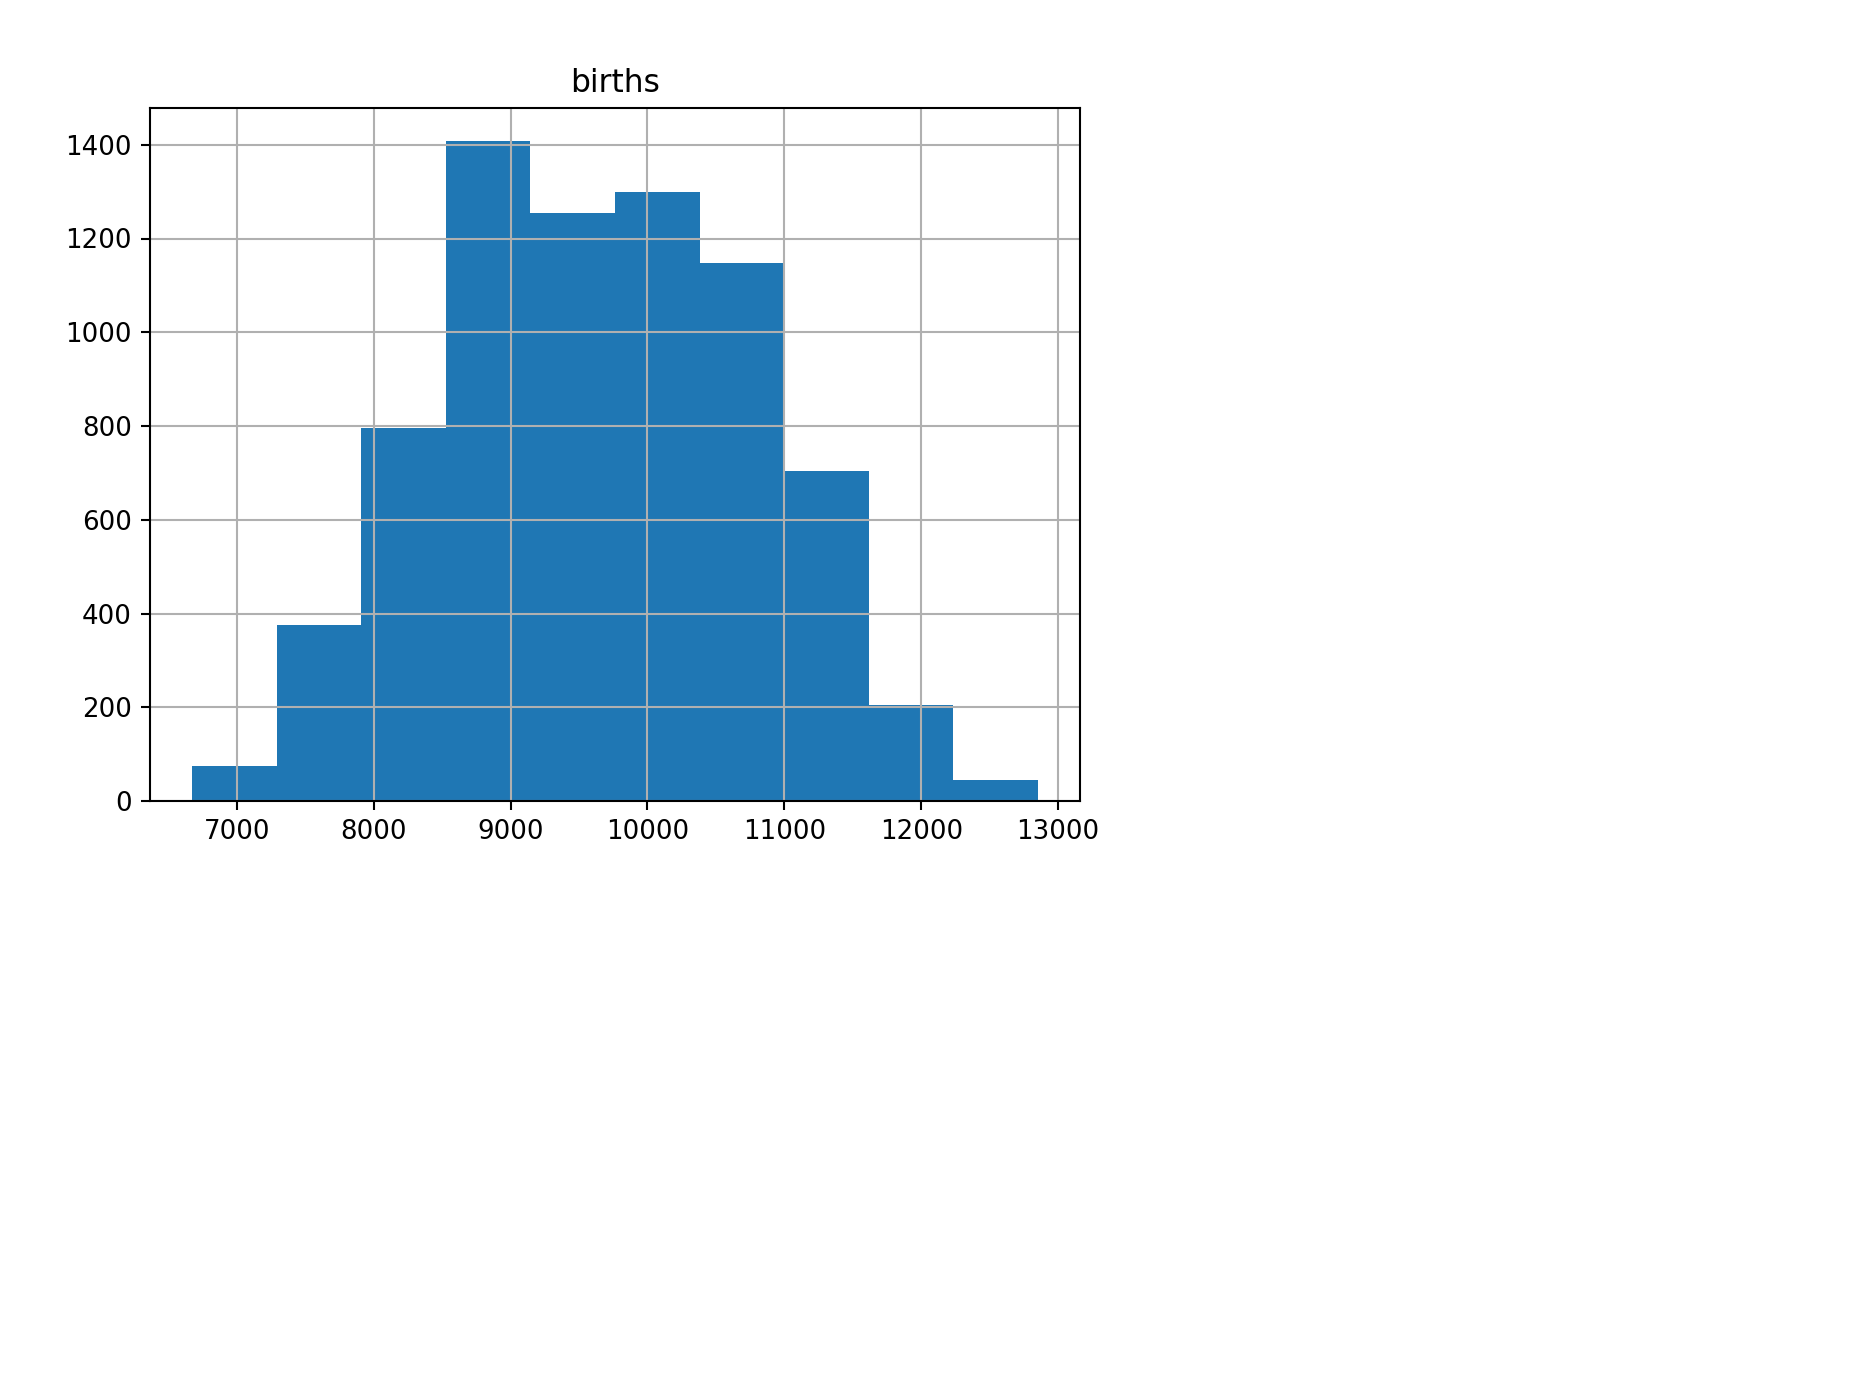

In [98]:
from calendar import isleap
data = read_csv("/home/jovyan/host-note/births.csv", header=0)
num_of_days = data['year'].unique().size * 365 + np.sum(np.array(list(map(lambda y: isleap(y), data['year'].unique()))))
print(f"Średnia ilość urodzeń w ciagu dnia to: {data['births'].sum() / num_of_days}")
hist = data.hist(column=['births'])

## Plots
Do rysowania wykresów wykorzystano biblioteka k3d.

In [10]:
# from numpy import exp,array,random,float32
# import k3d
    
# def plot_particles(particles):
#     if len(particles) == 0:
#         print("No particles to visualize !")
#         return
#     if len(particles[0].position) != 2:
#         print("I can only visualize three dimensional function !")
#         return
#     x = list(map(lambda p: (p.position[0], p.position[1], fitness(p.position)), particles))
#     plot = k3d.plot(name='points')
#     plt_points = k3d.points(positions=x, point_size=0.2)
#     plot += plt_points
#     plt_points.shader='3d'
#     plot.display()